In [1]:
%matplotlib inline

import pandas
import sklearn.metrics
import statistics
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%.2f'%x)

#load the data
data = pandas.read_csv('..\separatedData.csv')

# convert to numeric format
data["breastCancer100th"] = pandas.to_numeric(data["breastCancer100th"], errors='coerce')
data["meanSugarPerson"]   = pandas.to_numeric(data["meanSugarPerson"], errors='coerce')
data["meanFoodPerson"]   = pandas.to_numeric(data["meanFoodPerson"], errors='coerce')
data["meanCholesterol"]   = pandas.to_numeric(data["meanCholesterol"], errors='coerce')

# listwise deletion of missing values
sub1 = data[['breastCancer100th', 'meanFoodPerson', 'meanCholesterol', 'meanSugarPerson']].dropna()

In [2]:
# Create the conditions to a new variable named incidence_cancer that will categorize the meanSugarPerson answers
meanIncidence = statistics.mean(sub1['breastCancer100th'])

def incidence_cancer (row):
    if row['breastCancer100th'] <= meanIncidence : return 0   # Incidence of breast cancer is below the 
                                                              # average of the incidence of all countries.
    if row['breastCancer100th'] > meanIncidence  : return 1   # Incidence of breast cancer is above the average 
                                                              # of the incidence of all countries.

# Add the new variable sugar_consumption to subData
sub1['incidence_cancer'] = sub1.apply (lambda row: incidence_cancer (row),axis=1)

In [3]:
#Split into training and testing sets
predictors = sub1[[ 'meanSugarPerson', 'meanFoodPerson', 'meanCholesterol']]
targets = sub1['incidence_cancer']

#Train = 60%, Test = 40%
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [4]:
#Build model on training data
classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

confusion_matrix = sklearn.metrics.confusion_matrix(tar_test,predictions)
accuracy_score = sklearn.metrics.accuracy_score(tar_test, predictions)

print (confusion_matrix)
print (accuracy_score)


# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[[31  3]
 [ 2 16]]
0.903846153846
[ 0.21311057  0.38723056  0.39965887]


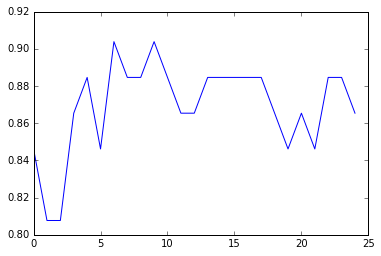

In [5]:
"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
    
plt.cla()
plt.plot(trees, accuracy)

In [6]:
print(accuracy)

[ 0.84615385  0.80769231  0.80769231  0.86538462  0.88461538  0.84615385
  0.90384615  0.88461538  0.88461538  0.90384615  0.88461538  0.86538462
  0.86538462  0.88461538  0.88461538  0.88461538  0.88461538  0.88461538
  0.86538462  0.84615385  0.86538462  0.84615385  0.88461538  0.88461538
  0.86538462]


In [8]:
statistics.mean(accuracy)

0.86923076923076925